<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- AirQuality 데이터어 데해 모델링합니다.
- 다중 선형회귀 모델을 만들고 평가합니다.
- 특히 회귀 계수를 명확히 이해합니다.
- 예측 결과를 시각화합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [5]:
# 기초통계량 확인
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353,6.993464,15.803922
std,30.156127,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,20.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,34.000000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,59.000000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [6]:
# NaN 값 확인
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [7]:
# 상관관계 확인
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 결측치 처리**

- 시계열 데이터이므로 선형보간법으로 채웁니다.

In [10]:
# 결측치 확인
data['Solar.R'].isna().sum()

7

In [12]:
# 결측치 채우기
data['Solar.R'].interpolate(method='linear', inplace=True)

# 확인
data['Solar.R'].isna().sum()

0

**2) 불필요한 변수 제거**

In [13]:
# 불필요한 변수 Month, Day 제거
cols = ['Month', 'Day']
data.drop(cols, axis=1, inplace=True)

# 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.000000,7.4,67
1,36,118.000000,8.0,72
2,12,149.000000,12.6,74
3,18,313.000000,11.5,62
4,19,308.333333,14.3,56


**3) x, y 분리**

In [42]:
# target 확인
target = 'Ozone'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**4) 학습용, 평가용 데이터 분리**

In [43]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                   random_state=2022)

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.

In [44]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [45]:
# 2단계: 선언하기
model = LinearRegression()

In [46]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [54]:
# 회귀계수 확인
print(list(x)) # 컬럼이름 표시
print(model.coef_) # 기울기 == 가중치
print(model.intercept_) # 절편

# Ozone = 0.044 * Solar.R - 3.65 * Wind + 1.35 * Temp - 35.74

['Solar.R', 'Wind', 'Temp']
[ 0.04499498 -3.64796704  1.3457936 ]
-35.74930628112196


In [53]:
print(list(x))
print(list(x.columns))

['Solar.R', 'Wind', 'Temp']
['Solar.R', 'Wind', 'Temp']


In [49]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [50]:
# 5단계: 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 13.445749810271392
R2-Score: 0.6645460869554878


# 5.기타

- 기타 필요한 내용이 있으면 진횅합니다.

**1) 회귀식 시각화**

> 변수가 3개이기 때문에 그리기 어렵다!

**2) 예측값, 시각값 시각화**

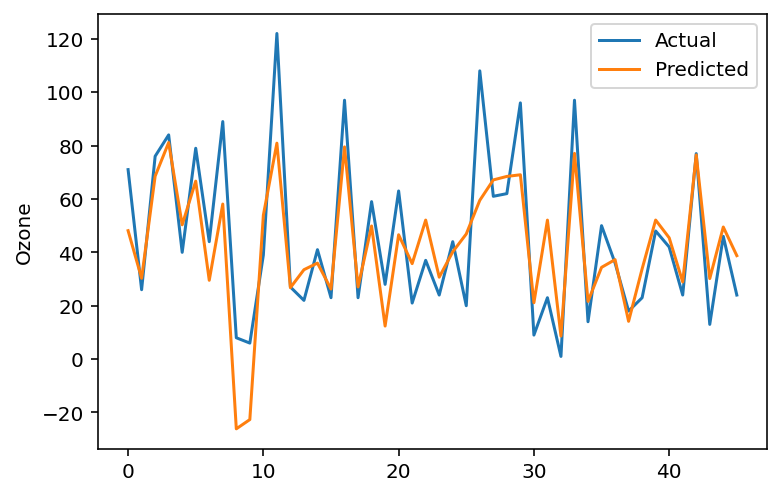

In [51]:
# 예측값, 실제값 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.ylabel('Ozone')
plt.show()